In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from preprocessing.memory import MemoryUtil
from preprocessing.nv import NVUtil
from preprocessing.outlier import OutlierUtil
from preprocessing.scalar import ScalarUtil
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
### Problem Definition
### Columns Description
### Exploratory Data Analysis (5 Hypothesis)
### Preprocessing
### - Null Value Treatment
### - Outlier Treatment
### - MinMax Scalar
### - Garbage value treatment
### - Standard Scalar
### - Label encoding
### - Dummy variable
### Model building
### Model validation
### Model interpretation
### Model visualization
### Deployment

In [4]:
### Run the below command from Anaconda prompt to get the table of content
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
# this will enable the nbextensions tab on the home page. 
# enable the table of content extension, restart kernel

### Problem Definition
#### Customer churn analysis

### Business Objective
#### Segment customers based on number of vmail, day/eve/night calls, day/eve/night charge, day/eve/night minutes and the number of customer service calls made

### Outcomes
#### Form two segments happy and unhappy customers. Target the unhappy customers

In [5]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"D:\sanooj\datascience\data\telecom_churn.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
df[df['churn']==True].shape
df[df['churn']==False].shape

# We can ignore the churn column from the analysis and see if the cluster that we form is matching with the 
# churn column

(483, 21)

(2850, 21)

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Columns Description
#### Consider all columns except churn for analysis.  Also for variable selection we can follow 2 approaches
##### Business method (select variables based on the business value)
We can choose to pick the right variables based on the actions we can perform. This is called <b>prioritization matrix</b>
<img src='img/prioritization-matrix.png'/>
<img src='img/action-priority-matrix.webp'/>

##### Statistical method (select all continuous variables having more than 'n' unique values OR select all continous variables with highest variance

In [8]:
### We will follow the 4.1.2 approach
df.var().sort_values(ascending=False)

total day minutes         2966.696487
total eve minutes         2571.894016
total night minutes       2557.714002
area code                 1795.326257
account length            1585.800121
total day calls            402.768141
total eve calls            396.910999
total night calls          382.930472
number vmail messages      187.371347
total day charge            85.737128
total eve charge            18.581856
total intl minutes           7.794368
total intl calls             6.057576
total night charge           5.179597
customer service calls       1.730517
total intl charge            0.568173
churn                        0.123951
dtype: float64

In [9]:
# important_columns = df.var().sort_values(ascending=False).head().index
# we can pick the columns blindly like this OR we can pick the one's we feel important
important_columns = ['total day minutes','total eve minutes','total night minutes','area code','total day calls','total eve calls','total night calls','number vmail messages','customer service calls']
important_columns

['total day minutes',
 'total eve minutes',
 'total night minutes',
 'area code',
 'total day calls',
 'total eve calls',
 'total night calls',
 'number vmail messages',
 'customer service calls']

In [10]:
df = df[important_columns]
df.head()
df.describe()

,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls
0,265.1,197.4,244.7,415,110,99,91,25,1
1,161.6,195.5,254.4,415,123,103,103,26,1
2,243.4,121.2,162.6,415,114,110,104,0,0
3,299.4,61.9,196.9,408,71,88,89,0,2
4,166.7,148.3,186.9,415,113,122,121,0,3


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,200.980348,200.872037,437.182418,100.435644,100.114311,100.107711,8.099010,1.562856
std,54.467389,50.713844,50.573847,42.371290,20.069084,19.922625,19.568609,13.688365,1.315491
min,0.000000,0.000000,23.200000,408.000000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,143.700000,166.600000,167.000000,408.000000,87.000000,87.000000,87.000000,0.000000,1.000000
50%,179.400000,201.400000,201.200000,415.000000,101.000000,100.000000,100.000000,0.000000,1.000000
75%,216.400000,235.300000,235.300000,510.000000,114.000000,114.000000,113.000000,20.000000,2.000000
max,350.800000,363.700000,395.000000,510.000000,165.000000,170.000000,175.000000,51.000000,9.000000


### Preprocessing
#### Memory optimization

In [11]:
df = MemoryUtil.memory_optimize(df)

Memory usage before optimization is: 0.23 MB
Memory usage after optimization is: 0.05 MB
Decreased by 77.7%


D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\memory\MemoryUtil.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)
D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\memory\MemoryUtil.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int16)
D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\memory\MemoryUtil.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

#### Null value treatment

In [12]:
df.isna().sum()

total day minutes         0
total eve minutes         0
total night minutes       0
area code                 0
total day calls           0
total eve calls           0
total night calls         0
number vmail messages     0
customer service calls    0
dtype: int64

In [13]:
excluded_columns,selected_columns,numerical_columns,categorical_columns,df = NVUtil.nv_treatment(df,30)
df


Before NV treatment the stats are as below
total day minutes         0
total eve minutes         0
total night minutes       0
area code                 0
total day calls           0
total eve calls           0
total night calls         0
number vmail messages     0
customer service calls    0
dtype: int64
Before NV treatment the stats are as below
total day minutes         0
total eve minutes         0
total night minutes       0
area code                 0
total day calls           0
total eve calls           0
total night calls         0
number vmail messages     0
customer service calls    0
dtype: int64


C:\Users\Rani\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Rani\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Rani\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Rani\An

,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls
0,265.000,197.37500,244.750,415,110,99,91,25,1
1,161.625,195.50000,254.375,415,123,103,103,26,1
2,243.375,121.18750,162.625,415,114,110,104,0,0
3,299.500,61.90625,196.875,408,71,88,89,0,2
4,166.750,148.25000,186.875,415,113,122,121,0,3
...,...,...,...,...,...,...,...,...,...
3328,156.250,215.50000,279.000,415,77,126,83,36,2
3329,231.125,153.37500,191.250,415,57,55,123,0,3
3330,180.750,288.75000,191.875,510,109,58,91,0,2
3331,213.750,159.62500,139.250,510,105,84,137,0,2


#### Outlier treatment

In [14]:
df = OutlierUtil.iqr_outlier_treatment(df,numerical_columns)


Before iqr outler treatment the stats are as below
       total day minutes  total eve minutes  total night minutes    area code  \
count         3333.00000         3333.00000          3333.000000  3333.000000   
mean                 inf                inf                  inf   437.182418   
std             54.46875           50.71875            50.562500    42.371290   
min              0.00000            0.00000            23.203125   408.000000   
25%            143.75000          166.62500           167.000000   408.000000   
50%            179.37500          201.37500           201.250000   415.000000   
75%            216.37500          235.25000           235.250000   510.000000   
max            350.75000          363.75000           395.000000   510.000000   

       total day calls  total eve calls  total night calls  \
count      3333.000000      3333.000000        3333.000000   
mean        100.435644       100.114311         100.107711   
std          20.069084        19

D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\outlier\OutlierUtil.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = fillval
D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\outlier\OutlierUtil.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = fillval
D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\outlier\OutlierUtil.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

After iqr outler treatment the stats are as below
       total day minutes  total eve minutes  total night minutes    area code  \
count        3333.000000        3333.000000          3333.000000  3333.000000   
mean          179.942019         201.177993           200.831271   437.182418   
std            52.668283          49.033853            48.414739    42.371290   
min            35.093750          64.312500            65.687500   408.000000   
25%           144.250000         167.250000           167.625000   408.000000   
50%           179.375000         201.375000           201.250000   415.000000   
75%           216.000000         234.875000           234.750000   510.000000   
max           324.750000         337.000000           334.750000   510.000000   

       total day calls  total eve calls  total night calls  \
count      3333.000000      3333.000000        3333.000000   
mean        100.590459       100.163516          99.973597   
std          19.350296        19.3

#### MinMax treatment

In [15]:
df = ScalarUtil.min_max_scalar(df,numerical_columns)
df


Before MinMax treatment the stats are as below
       total day minutes  total eve minutes  total night minutes    area code  \
count        3333.000000        3333.000000          3333.000000  3333.000000   
mean          179.942019         201.177993           200.831271   437.182418   
std            52.668283          49.033853            48.414739    42.371290   
min            35.093750          64.312500            65.687500   408.000000   
25%           144.250000         167.250000           167.625000   408.000000   
50%           179.375000         201.375000           201.250000   415.000000   
75%           216.000000         234.875000           234.750000   510.000000   
max           324.750000         337.000000           334.750000   510.000000   

       total day calls  total eve calls  total night calls  \
count      3333.000000      3333.000000        3333.000000   
mean        100.590459       100.163516          99.973597   
std          19.350296        19.311

D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\scalar\ScalarUtil.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = x
D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\scalar\ScalarUtil.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = x
D:\sanooj\datascience\notebooks\spklearn-ml\preprocessing\scalar\ScalarUtil.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls
0,0.793721,0.487967,0.665505,0.068627,0.600000,0.481132,0.413462,0.50,0.333333
1,0.436832,0.481091,0.701278,0.068627,0.723810,0.518868,0.528846,0.52,0.333333
2,0.719064,0.208572,0.360279,0.068627,0.638095,0.584906,0.538462,0.00,0.000000
3,0.912828,0.502636,0.487573,0.000000,0.228571,0.377358,0.394231,0.00,0.666667
4,0.454526,0.307816,0.450407,0.068627,0.628571,0.698113,0.701923,0.00,1.000000
...,...,...,...,...,...,...,...,...,...
3328,0.418276,0.554435,0.792799,0.068627,0.285714,0.735849,0.336538,0.72,0.666667
3329,0.676772,0.326610,0.466667,0.068627,0.095238,0.066038,0.721154,0.00,1.000000
3330,0.502859,0.823058,0.468990,1.000000,0.590476,0.094340,0.413462,0.00,0.666667
3331,0.616787,0.349530,0.273403,1.000000,0.552381,0.339623,0.855769,0.00,0.666667


In [16]:
## MinMax brings all values between 0 and 1
## We don't need StandardScalar here, if we apply StandardScalar, then each column will have different max min 
## value. StandardScaler converts the value into normal distribution

### Model Building

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
km.fit(df)
km.predict(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([0, 0, 0, ..., 1, 1, 0])

In [31]:
df['cluster'] = km.predict(df)
df['cluster'].value_counts()

C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    2328
1    1005
Name: cluster, dtype: int64

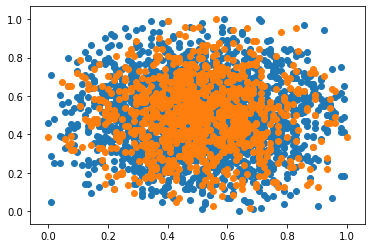

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df[df['cluster'] == 0]['total day calls'],df[df['cluster'] == 0]['total night calls'])
plt.scatter(df[df['cluster'] == 1]['total day calls'],df[df['cluster'] == 1]['total night calls'])

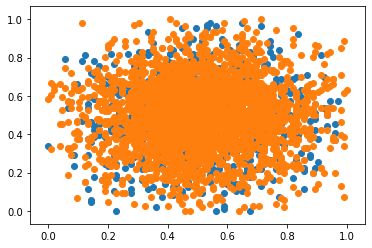

In [20]:
plt.scatter(df[df['cluster'] == 0]['total day calls'],df[df['cluster'] == 0]['total eve calls'])
plt.scatter(df[df['cluster'] == 1]['total day calls'],df[df['cluster'] == 1]['total eve calls'])

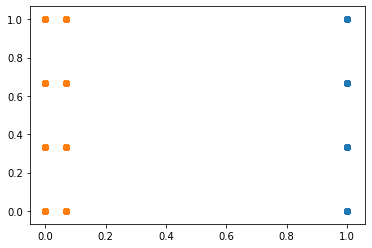

In [21]:
plt.scatter(df[df['cluster'] == 0]['area code'],df[df['cluster'] == 0]['customer service calls'])
plt.scatter(df[df['cluster'] == 1]['area code'],df[df['cluster'] == 1]['customer service calls'])

<Figure size 1080x1080 with 0 Axes>

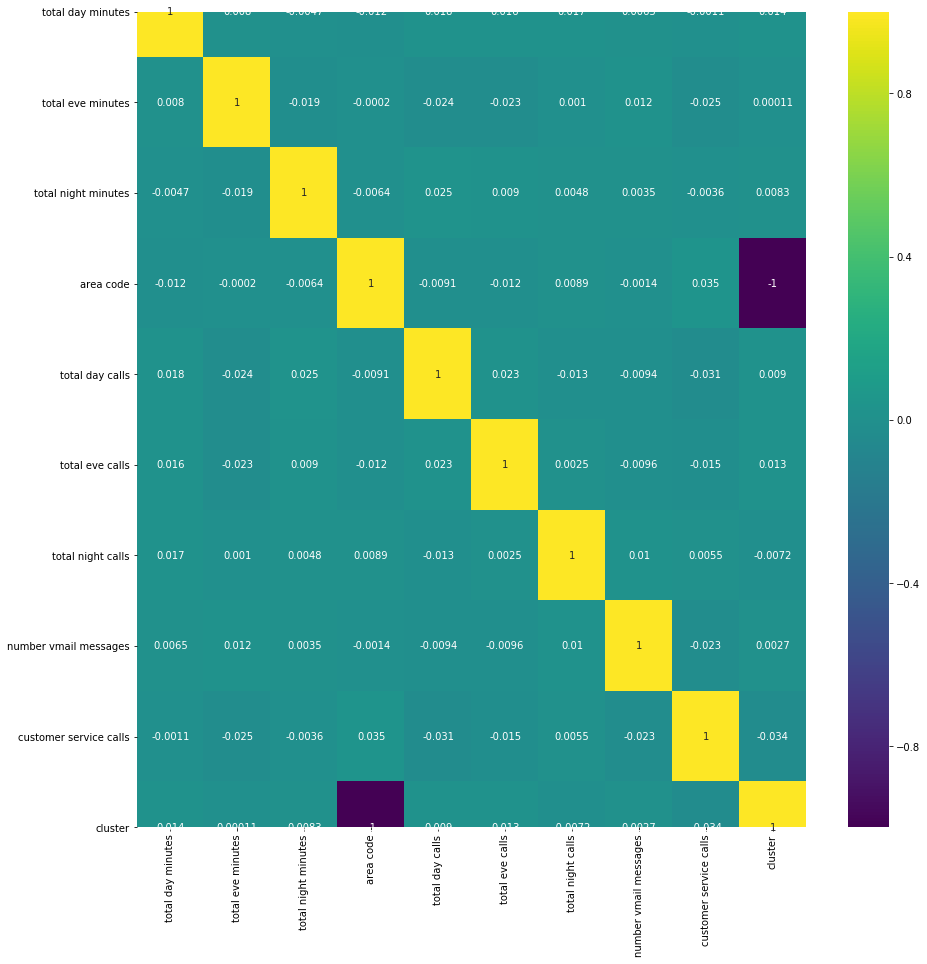

In [23]:
#counter = len(important_columns) * len(important_columns)
#for outer in important_columns:
    #for inner in important_columns:
    
#plt.figure(figsize=(20,10))
#plt.subplot(2,2,1)
#plt.scatter(df['Customers'],df['Customers'])
#plt.subplot(2,2,2)
#plt.scatter(df['Customers'],1/df['Customers'])
#plt.subplot(2,2,3)
#plt.scatter(df['Customers'],df['Customers']**3)
#plt.subplot(2,2,4)
#plt.scatter(df['Customers'],df['Customers']**4)

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
    

In [25]:
df_clus_0 = df[df['cluster'] == 0]
df_clus_1 = df[df['cluster'] == 1]

df_clus_0
df_clus_1
df

,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster
0,0.793721,0.487967,0.665505,0.068627,0.600000,0.481132,0.413462,0.50,0.333333,0
1,0.436832,0.481091,0.701278,0.068627,0.723810,0.518868,0.528846,0.52,0.333333,0
2,0.719064,0.208572,0.360279,0.068627,0.638095,0.584906,0.538462,0.00,0.000000,0
3,0.912828,0.502636,0.487573,0.000000,0.228571,0.377358,0.394231,0.00,0.666667,0
4,0.454526,0.307816,0.450407,0.068627,0.628571,0.698113,0.701923,0.00,1.000000,0
...,...,...,...,...,...,...,...,...,...,...
3326,0.246952,0.808389,0.420674,0.068627,0.771429,0.367925,0.423077,0.00,0.333333,0
3327,0.344050,0.460005,0.578630,0.068627,0.485714,0.188679,0.769231,0.00,0.666667,0
3328,0.418276,0.554435,0.792799,0.068627,0.285714,0.735849,0.336538,0.72,0.666667,0
3329,0.676772,0.326610,0.466667,0.068627,0.095238,0.066038,0.721154,0.00,1.000000,0


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster
5,0.650016,0.573229,0.513589,1.0,0.485714,0.500000,0.673077,0.00,0.000000,1
6,0.632323,0.502636,0.546109,1.0,0.390476,0.566038,0.673077,0.48,1.000000,1
13,0.419571,0.672244,0.470383,1.0,0.390476,0.254717,0.644231,0.00,1.000000,1
17,0.537383,0.564520,0.237631,1.0,0.638095,0.594340,0.701923,0.00,1.000000,1
18,0.533930,0.544350,0.371893,1.0,0.180952,0.160377,0.576923,0.66,0.333333,1
...,...,...,...,...,...,...,...,...,...,...
3304,0.521415,0.492551,0.523345,1.0,0.638095,0.867925,0.307692,0.00,0.333333,1
3316,0.445463,0.567729,0.574448,1.0,0.609524,0.452830,0.576923,0.58,0.000000,1
3320,0.362175,0.484300,0.202323,1.0,0.514286,0.273585,0.817308,0.00,0.333333,1
3330,0.502859,0.823058,0.468990,1.0,0.590476,0.094340,0.413462,0.00,0.666667,1


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster
0,0.793721,0.487967,0.665505,0.068627,0.600000,0.481132,0.413462,0.50,0.333333,0
1,0.436832,0.481091,0.701278,0.068627,0.723810,0.518868,0.528846,0.52,0.333333,0
2,0.719064,0.208572,0.360279,0.068627,0.638095,0.584906,0.538462,0.00,0.000000,0
3,0.912828,0.502636,0.487573,0.000000,0.228571,0.377358,0.394231,0.00,0.666667,0
4,0.454526,0.307816,0.450407,0.068627,0.628571,0.698113,0.701923,0.00,1.000000,0
...,...,...,...,...,...,...,...,...,...,...
3328,0.418276,0.554435,0.792799,0.068627,0.285714,0.735849,0.336538,0.72,0.666667,0
3329,0.676772,0.326610,0.466667,0.068627,0.095238,0.066038,0.721154,0.00,1.000000,0
3330,0.502859,0.823058,0.468990,1.000000,0.590476,0.094340,0.413462,0.00,0.666667,1
3331,0.616787,0.349530,0.273403,1.000000,0.552381,0.339623,0.855769,0.00,0.666667,1


In [26]:
df_original = pd.read_csv(r"D:\sanooj\datascience\data\telecom_churn.csv")
df['churn'] = df_original['churn']
df

C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster,churn
0,0.793721,0.487967,0.665505,0.068627,0.600000,0.481132,0.413462,0.50,0.333333,0,False
1,0.436832,0.481091,0.701278,0.068627,0.723810,0.518868,0.528846,0.52,0.333333,0,False
2,0.719064,0.208572,0.360279,0.068627,0.638095,0.584906,0.538462,0.00,0.000000,0,False
3,0.912828,0.502636,0.487573,0.000000,0.228571,0.377358,0.394231,0.00,0.666667,0,False
4,0.454526,0.307816,0.450407,0.068627,0.628571,0.698113,0.701923,0.00,1.000000,0,False
...,...,...,...,...,...,...,...,...,...,...,...
3328,0.418276,0.554435,0.792799,0.068627,0.285714,0.735849,0.336538,0.72,0.666667,0,False
3329,0.676772,0.326610,0.466667,0.068627,0.095238,0.066038,0.721154,0.00,1.000000,0,False
3330,0.502859,0.823058,0.468990,1.000000,0.590476,0.094340,0.413462,0.00,0.666667,1,False
3331,0.616787,0.349530,0.273403,1.000000,0.552381,0.339623,0.855769,0.00,0.666667,1,False


In [33]:
df[(df['cluster']==0) & (df['churn']==False)] #2135
df[(df['cluster']==1) & (df['churn']==True)]  #125
df[(df['cluster']==0) & (df['churn']==True)]  #358
df[(df['cluster']==1) & (df['churn']==False)] #715


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster,churn
0,0.793721,0.487967,0.665505,0.068627,0.600000,0.481132,0.413462,0.50,0.333333,0,False
1,0.436832,0.481091,0.701278,0.068627,0.723810,0.518868,0.528846,0.52,0.333333,0,False
2,0.719064,0.208572,0.360279,0.068627,0.638095,0.584906,0.538462,0.00,0.000000,0,False
3,0.912828,0.502636,0.487573,0.000000,0.228571,0.377358,0.394231,0.00,0.666667,0,False
4,0.454526,0.307816,0.450407,0.068627,0.628571,0.698113,0.701923,0.00,1.000000,0,False
...,...,...,...,...,...,...,...,...,...,...,...
3326,0.246952,0.808389,0.420674,0.068627,0.771429,0.367925,0.423077,0.00,0.333333,0,False
3327,0.344050,0.460005,0.578630,0.068627,0.485714,0.188679,0.769231,0.00,0.666667,0,False
3328,0.418276,0.554435,0.792799,0.068627,0.285714,0.735849,0.336538,0.72,0.666667,0,False
3329,0.676772,0.326610,0.466667,0.068627,0.095238,0.066038,0.721154,0.00,1.000000,0,False


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster,churn
69,0.496386,0.384369,0.308246,1.0,0.514286,0.584906,0.500000,0.00,0.333333,1,True
84,0.605998,0.678203,0.467131,1.0,0.466667,0.349057,0.384615,0.00,0.666667,1,True
115,0.558097,0.698831,0.269686,1.0,0.400000,0.698113,0.750000,0.84,0.000000,1,True
127,0.526162,0.301857,0.594890,1.0,0.733333,0.518868,0.778846,0.54,0.333333,1,True
197,0.498112,0.410497,0.431359,1.0,0.190476,0.613208,0.519231,0.00,0.666667,1,True
...,...,...,...,...,...,...,...,...,...,...,...
3255,0.867084,0.450837,0.299419,1.0,0.133333,0.113208,0.634615,0.00,0.666667,1,True
3272,0.897292,0.584231,0.608362,1.0,0.895238,0.500000,0.586538,0.00,0.666667,1,True
3291,0.473082,0.584231,0.313357,1.0,0.685714,0.801887,0.442308,0.44,0.333333,1,True
3304,0.521415,0.492551,0.523345,1.0,0.638095,0.867925,0.307692,0.00,0.333333,1,True


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster,churn
10,0.324630,0.602109,0.531707,0.068627,0.857143,0.330189,0.605769,0.00,0.333333,0,True
15,0.498112,0.929406,0.352846,0.068627,0.190476,0.462264,0.769231,0.00,0.333333,0,True
21,0.094293,0.387119,0.534959,0.000000,0.400000,0.688679,0.153846,0.00,0.333333,0,True
33,0.740641,0.689663,0.797445,0.000000,0.676190,0.669811,0.403846,0.00,0.333333,0,True
41,0.476535,0.511804,0.209988,0.000000,0.361905,0.556604,0.288462,0.82,0.000000,0,True
...,...,...,...,...,...,...,...,...,...,...,...
3280,0.249326,0.637864,0.765854,0.000000,0.885714,0.801887,0.653846,0.00,0.333333,0,True
3287,0.567591,0.259225,0.442044,0.068627,0.685714,0.396226,0.009615,0.84,0.333333,0,True
3301,0.845507,0.505845,0.338444,0.068627,0.628571,0.396226,0.528846,0.00,0.000000,0,True
3322,0.987054,0.737795,0.426713,0.000000,0.552381,0.698113,0.230769,0.00,0.333333,0,True


,total day minutes,total eve minutes,total night minutes,area code,total day calls,total eve calls,total night calls,number vmail messages,customer service calls,cluster,churn
5,0.650016,0.573229,0.513589,1.0,0.485714,0.500000,0.673077,0.00,0.000000,1,False
6,0.632323,0.502636,0.546109,1.0,0.390476,0.566038,0.673077,0.48,1.000000,1,False
13,0.419571,0.672244,0.470383,1.0,0.390476,0.254717,0.644231,0.00,1.000000,1,False
17,0.537383,0.564520,0.237631,1.0,0.638095,0.594340,0.701923,0.00,1.000000,1,False
18,0.533930,0.544350,0.371893,1.0,0.180952,0.160377,0.576923,0.66,0.333333,1,False
...,...,...,...,...,...,...,...,...,...,...,...
3298,0.148560,0.641531,0.292451,1.0,0.219048,0.632075,0.615385,0.00,0.333333,1,False
3302,0.407919,0.537016,0.326365,1.0,0.295238,0.481132,0.500000,0.00,0.333333,1,False
3316,0.445463,0.567729,0.574448,1.0,0.609524,0.452830,0.576923,0.58,0.000000,1,False
3330,0.502859,0.823058,0.468990,1.0,0.590476,0.094340,0.413462,0.00,0.666667,1,False


In [ ]:
# if it's a sales related dataset, then for each cluster we can find the mean and those customers below 
# the mean sales can be targetted.
# Through this process, we can generate [(mean) - sum(sales) of such rows] which is < mean sales figure 
# additional income

##### KElbow

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'The elbow method')

Text(0.5, 0, 'The number of clusters')

Text(0, 0.5, 'WCSS')

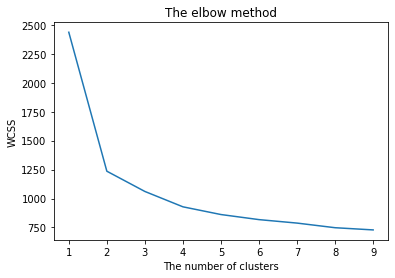

In [25]:
from sklearn.cluster import KMeans
x = []
k=10
for i in range(1,k):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    x.append(kmeans.inertia_)

plt.plot(range(1,k), x)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 1.0, 'Dendrogram')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Euclidean distances')

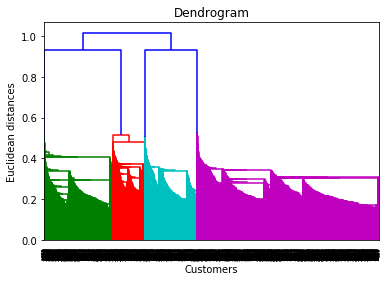

In [35]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()